In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1


Формула нормализованной гауссовой функции со средним значением $\mu$ и стандартным отклонением $\sigma$:

$$
    g \left(x\right) = \dfrac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\dfrac{\left(x - \mu \right)^2}{2 \sigma ^2}\right)
$$

Необходимо написать функцию, основанную на использовании массивов NumPy для вычисления гауссовых функций при $\mu = 0$ и $\sigma ^2 = 0.5; 1.0, 1.5$. Использовать сетку из $1000$ точек в интервале $−10 \leqslant x \leqslant 10$. Постройте графики данных функций.

In [2]:
def norm_gauss(
        x: float | np.ndarray,
        mu: float = 0.0,
        sigma: float = .5
) -> float | np.ndarray:
    g = 1 / (sigma * (2 * np.pi) ** .5) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return g

In [3]:
def draw_plot(
        data: np.ndarray,
        sigmas: list[float] = [.5, .0, 1.5]
) -> None:
    fig, ax = plt.subplots()
    
    for i, d in enumerate(data):
        plt.plot(d, label=r'$\sigma = $' f'{sigmas[i]}')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

    return

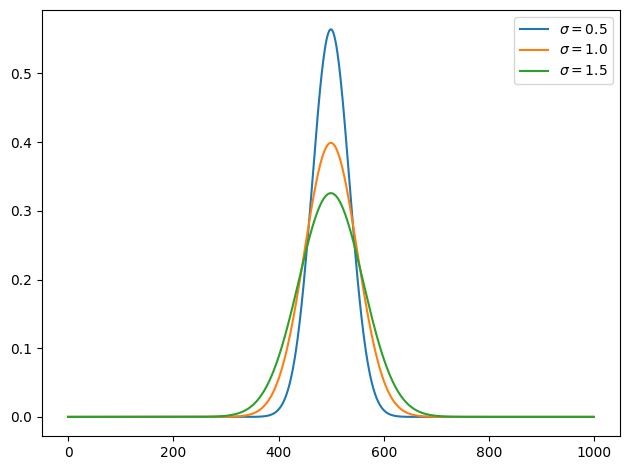

In [4]:
x = np.linspace(-10, 10, 1000)
sigma_list = np.array([.5, 1.0, 1.5])
results = np.zeros((sigma_list.shape[0], x.shape[0]))

for i, sigma in enumerate(sigma_list):
    results[i] = norm_gauss(x, sigma=sigma ** .5)

draw_plot(results, sigma_list)

### Задание 2

Уравнение Ван дер Ваальса, описывающее состояние газа, можно записать в виде следующей формулы как зависимость давления $p$ газа от его молярного объема $V$ и температуры $T$:

$$
    p = \dfrac{RT}{V-b} - \dfrac{a}{V^2}
$$

где $a$ и $b$ – специальные молекулярные константы, а $R = 8.314$ Дж / К∙моль – универсальная газовая константа. 

Формулу легко преобразовать для вычисления температуры по заданному давлению и объему, но ее форма, представляющая молярный объем в  отношении к  давлению и температуре, является кубическим уравнением:

$$
    pV^3 - \left(pb + RT\right)V^2 + aV - ab = 0
$$

Все три корня этого уравнения ниже критической точки ($T_c$, $p_c$) являются действительными: наибольший и наименьший соответствуют молярному объему
газообразной фазы и жидкой фазы соответственно. Выше критической точки,
где не существует жидкая фаза, только один корень является действительным
и  соответствует молярному объему газа (в этой области его также называют
сверхкритической жидкостью, или сверхкритической средой). 

Критическая точка определяется по условию $\left(\partial p/\partial V\right)_T = \left(\partial ^2 p/\partial V^2\right)_T = 0$ и для идеального газа Ван дер Ваальса выводятся формулы:

$$
    T_c = \dfrac{8a}{27Rb} \qquad p_c = \dfrac{a}{27b^2}
$$

Для $NH_3$ константы Ван дер Ваальса $a  = 0.4225$ $л^2 \cdot Па \cdot м^6 \cdot моль^{-2}$ и $b = 37.07 \times 10^{-6} \space м^3 \cdot моль^{-1}$.

- Найти критическую точку для аммиака, затем определить молярный объем при комнатной температуре и давлении ($298$ К, $1$ атм) и при следующих словиях ($500$ К, $12$ МПа).
- Изотерма – это множество точек ($p$, $V$) при постоянной температуре, соответствующее уравнению состояния газа. Построить изотерму ($p$ в зависимости от $V$) для аммиака при температуре $350$ К, используя уравнение Ван дер Ваальса, и сравнить ее с изотермой при температуре $350$ К для идеального газа, уравнение состояния которого имеет вид $p = RT/V$ (принять значения $p$ принадлежащими интервалу $\left[101 325; 1000000\right]$ Па, 1000 элементов).

In [5]:
from scipy.constants import R
import matplotlib.pyplot as plt

Polynomial = np.polynomial.Polynomial

In [6]:
def calculate_tc(a: float, b: float, r: float) -> float:
    return 8 * a / (27 * r * b)


def calculate_pc(a: float, b: float) -> float:
    return a / (27 * b ** 2)

In [24]:
def calculate_vm(
        t: float,
        p: float,
        a: float,
        b: float,
        r: float,
        which_root: str = 'max'
) -> float | None:
    if which_root not in ('max', 'min'):
        print('which_root parameter must be "min" or "max"')
        return
    
    foo = np.max if set(which_root) == 'max' else np.min

    tc = calculate_tc(a, b, r=r)
    pc = calculate_pc(a, b)

    poly = Polynomial(
        (
            -a * b,
            a, 
            -(p * b + r * t),
            p
        )
    )

    roots = poly.roots()
    roots = roots[~np.iscomplex(roots)].real

    if t > tc and p > pc:
        r, = roots
        return r
    
    return foo(roots)

In [25]:
a, b = .4225, 37.07e-6
tc = calculate_tc(a=a, b=b, r=R)
pc = calculate_pc(a=a, b=b)
tc, pc

(406.1590784720662, 11387221.72551026)

In [26]:
t1, p1 = 298, 101325
vm1 = calculate_vm(t=t1, p=p1, a=a, b=b, r=R)
print(vm1)

t2, p2 = 500, 12e6
vm2 = calculate_vm(t=t2, p=p2, a=a, b=b, r=R)
print(vm2)

roots [5.44346567e-05 1.16764843e-04 2.43189656e-02]
5.443465665498772e-05
roots [5.59788613e-05-4.08996354e-05j 5.59788613e-05+4.08996354e-05j
 2.71548220e-04+0.00000000e+00j]
0.0002715482199150116


In [10]:
count = 1000
p_array = np.linspace(101_325, 1000_000, count)

v_vapor = np.zeros_like(p_array)
for j, p in enumerate(p_array):
    v_vapor[j] = calculate_vm(t=350, p=p, a=a, b=b, r=R)

In [11]:
v_mk = np.zeros_like(v_vapor)
for j, p in enumerate(p_array):
    v_mk[j] = R * 350 / p

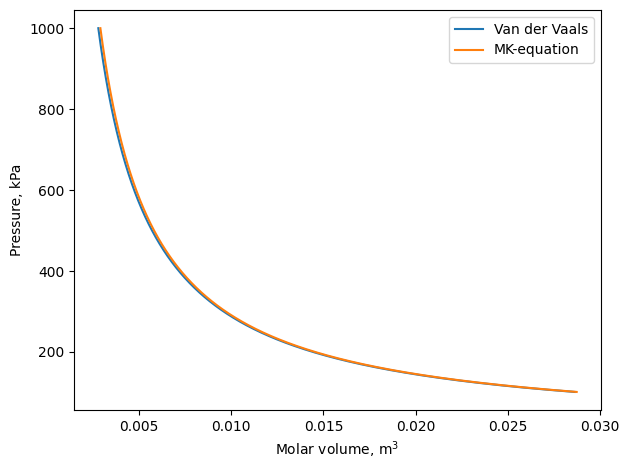

In [12]:
fig, ax = plt.subplots()

ax.plot(v_vapor, p_array / 1000, label='Van der Vaals')
ax.plot(v_mk, p_array / 1000, label='MK-equation')

ax.set_xlabel(r'Molar volume, m$^3$')
ax.set_ylabel('Pressure, kPa')

plt.legend()
plt.tight_layout()

### Задание 3

Закон Бугера–Ламберта–Бера связывает концентрацию c вещества в образце раствора с интенсивностью света, проходящего через этот образец $I_t$ с заданной толщиной слоя вещества $l$ при известной длине волны $\lambda$:

$$
    I_t = I_0 e^ {-\alpha c l}
$$

где $I_0$ - интенсивность света на входе в вещество, $\alpha$ - коэффициент поглощения при длине волны $\lambda$.

После проведения ряда измерений, позволяющих определить часть света, которая прошла сквозь раствор, $I_t /I_0$, коэффициент поглощения $\alpha$ можно при помощи линейной аппроксимации:

$$
    y = \ln \left(I_t/I_0\right) = -\alpha c l
$$

Несмотря на то что эта прямая проходит через начало координат ($y = 0$ при $c = 0$), мы будем выполнять подгонку для более общего линейного отношения:

$$
    y = mc + k
$$

где $m = -\alpha l$ с проверкой $k$ на приближение к нулю.

При рассмотрении образца раствора с толщиной слоя $0.8$ см при измерениях были получены данные, приведенные в таблице: отношение $I_t /I_0$ при пяти различных концентрациях:

|C, моль/л|$I_t /I_0$|
|-|-|
|0.4|0.891|
|0.6|0.841|
|0.8|0.783|
|1.0|0.744|
|1.2|0.692|

Используя линейную аппроксимацию, определите коэффициент $\alpha$. 

In [13]:
from scipy.optimize import least_squares

In [14]:
def residuals(
        params: tuple[float, float],
        c: np.ndarray,
        y: np.ndarray
) -> np.ndarray:
    m, k = params
    y_calc = m * c + k
    return y_calc - y

In [15]:
width = .8
c = np.array([.4, .6, .8, 1., 1.2])
it_over_i0 = np.array([.891, .841, .783, .744, .692])

In [16]:
x0 = 1., 1.
solution = least_squares(
    fun=residuals,
    x0=x0,
    args=(
        c,
        np.log(it_over_i0)
    )
)

In [17]:
m, k = solution.x
alpha = - m / width
alpha

0.39254223095320284

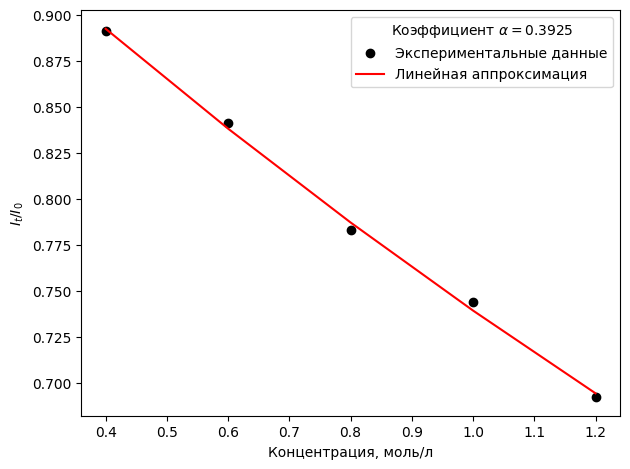

In [18]:
fig, ax = plt.subplots()

plt.plot(
    c, it_over_i0, 'o', color='k',
    label='Экспериментальные данные'
)
plt.plot(
    c, np.exp(m * c + k), color='r',
    label='Линейная аппроксимация'
)

ax.set_xlabel('Концентрация, моль/л')
ax.set_ylabel(r'$I_t/I_0$')

plt.legend(title=r'Коэффициент $\alpha = $' f'{alpha:.4f}')
plt.tight_layout()